In [8]:
from pyspark import SparkContext
sc = SparkContext()

In [4]:
import re
import csv
from datetime import datetime
from collections import namedtuple
%matplotlib inline
import matplotlib.pyplot as plt

# pip install workalendar
# https://github.com/novafloss/workalendar
from workalendar.europe import Italy

In [32]:
cal = Italy()

def def_is_holiday(dt_obj):
    if(cal.is_working_day(dt_obj)):
        return 0
    else:
        return 1

In [33]:
def do_parse(x):
    # Oggetto Datetime
    dt_obj = datetime.strptime(str(x[4]), '"%Y-%m-%d"')
    
    return row(
        zona = int(re.sub("[^0-9]", "", str(x[0]))),
        area = int(re.sub("[^0-9]", "", x[1])),
        sottoarea = int(re.sub("[^0-9]", "", x[2])),
        categoria = int(re.sub("[^0-9]", "", x[3])),
        timestamp = int(dt_obj.strftime("%s")),
        giorno_della_settimana = int(dt_obj.weekday()),
        giorno_del_mese = int(dt_obj.weekday())
        giorno_dell_anno = int(dt_obj.timetuple().tm_yday),
        mese = int(dt_obj.strftime("%m")),
        anno = int(dt_obj.strftime("%Y")),
        festivo = def_is_holiday(dt_obj),
        vendite = int(x[5])
        )
    

In [36]:
row = namedtuple("prodotto", ['zona','area','sottoarea','categoria','timestamp','giorno_della_settimana',
                              'giorno_dell_anno', 'mese', 'anno','festivo','vendite'])
    
def parse(sc,filepath):
    rawRdd = sc.textFile(filepath)
    
    header = rawRdd.first()

    # Togliamo l'header
    rawRdd = rawRdd.filter(lambda x: x != header)

    # Togliamo le righe vuote
    rawRdd = rawRdd.filter(lambda x: x != "")
    
    return rawRdd.map(lambda x: x.split(",")).map(lambda x: do_parse(x))


In [37]:
rdd = parse(sc,"dataset_polimi.csv")
rdd.take(1)

[prodotto(zona=1, area=1, sottoarea=5, categoria=1, timestamp=1388534400, giorno_della_settimana=2, giorno_dell_anno=1, mese=1, anno=2014, festivo=1, vendite=0)]

Data Analysis
--

Zone
----

[(1, 6960),
 (2, 10440),
 (3, 10440),
 (4, 8700),
 (5, 10440),
 (6, 8700),
 (7, 8700),
 (8, 12180),
 (9, 5220),
 (10, 10440),
 (11, 6960),
 (12, 5220),
 (13, 6960),
 (14, 17400),
 (15, 10440),
 (16, 10440),
 (17, 10440),
 (18, 13920),
 (19, 8700),
 (20, 10440),
 (21, 10440),
 (22, 12180),
 (23, 10440),
 (24, 5220),
 (25, 5220),
 (26, 3480),
 (27, 10440)]

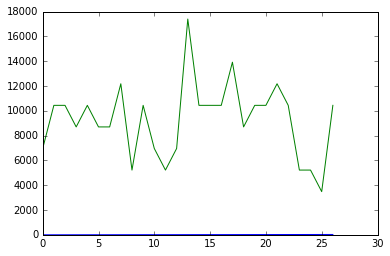

In [13]:
zone = (rdd.map(lambda x: (x.zona,1))
                       .reduceByKey(lambda x,y: x+y)).collect()
plt.plot(zone)
zone

Aree
---

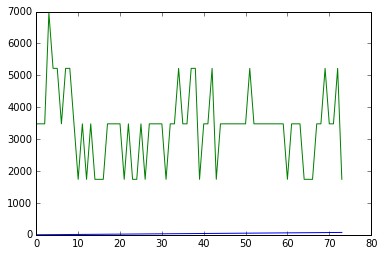

In [19]:
aree = (rdd.map(lambda x: (x.area,1))
                       .reduceByKey(lambda x,y: x+y)).collect()
plot = plt.plot(aree)

Categorie
---

In [22]:
categorie = (rdd.map(lambda x: (x.categoria,1))
                       .reduceByKey(lambda x,y: x+y)).collect()
categorie

[(1, 125280), (2, 125280)]

Settimana
---

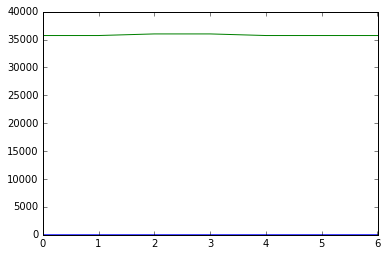

In [31]:
giorni = (rdd.map(lambda x: (x.giorno_della_settimana,1))
                       .reduceByKey(lambda x,y: x+y)).collect()
plot = plt.plot(giorni)